# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [38]:
def apply_svd_custom(X_train, X_test, n_components):
   # Concatenate X_train and X_test to apply SVD jointly
    X_combined = np.concatenate([X_train, X_test], axis=0)

    # Compute covariance matrix
    covariance_matrix = np.dot(X_combined.T, X_combined)

    # Get eigenvalues and eigenvectors
    eig_values, eig_vectors = np.linalg.eig(covariance_matrix)

    # Sort eigenvalues and eigenvectors in decreasing order
    sorted_indices = np.argsort(eig_values)[::-1]
    eig_values = eig_values[sorted_indices]
    eig_vectors = eig_vectors[:, sorted_indices]

    # Select the top 'n_components' singular vectors
    U = eig_vectors[:, :n_components]

    S = np.sqrt(eig_values[:n_components])

    # Apply dimensionality reduction to X_train and X_test separately
    X_train_reduced = np.dot(X_train, U)
    X_test_reduced = np.dot(X_test, U)

    # Apply dimensionality reduction to X_train and X_test separately
    X_train_reduced = np.dot(X_train, U)
    X_test_reduced = np.dot(X_test, U)

    return X_train_reduced, X_test_reduced, U, S

## Part 3: Train Logistic Regression and Measure Performance

In [35]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42)

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [5]:
svd_components = [384, 200, 100, 50, 20]  # You need to decide what number to search...

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")

    # Apply SVD to both the training and test sets at the same time
    X_train_svd, X_test_svd = apply_svd_custom(X_train, X_test, n_components=n_components)

    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    # Store the results
    results.append((n_components, accuracy, training_time))

    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")



Training models with different levels of SVD preprocessing...
Applying custom SVD with 384 components...
SVD components: 384, Accuracy: 0.9200, Training time: 370.7488 seconds
Applying custom SVD with 200 components...
SVD components: 200, Accuracy: 0.9206, Training time: 147.2442 seconds
Applying custom SVD with 100 components...
SVD components: 100, Accuracy: 0.9176, Training time: 58.0555 seconds
Applying custom SVD with 50 components...
SVD components: 50, Accuracy: 0.9091, Training time: 14.7890 seconds
Applying custom SVD with 20 components...
SVD components: 20, Accuracy: 0.8778, Training time: 2.1088 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


SVD components: 10, Accuracy: 0.8021, Training time: 1.7311 seconds
SVD components: 20, Accuracy: 0.8778, Training time: 1.5169 seconds
SVD components: 50, Accuracy: 0.9091, Training time: 15.0662 seconds
SVD components: 100, Accuracy: 0.9176, Training time: 59.0067 seconds
SVD components: 200, Accuracy: 0.9206, Training time: 150.4796 seconds


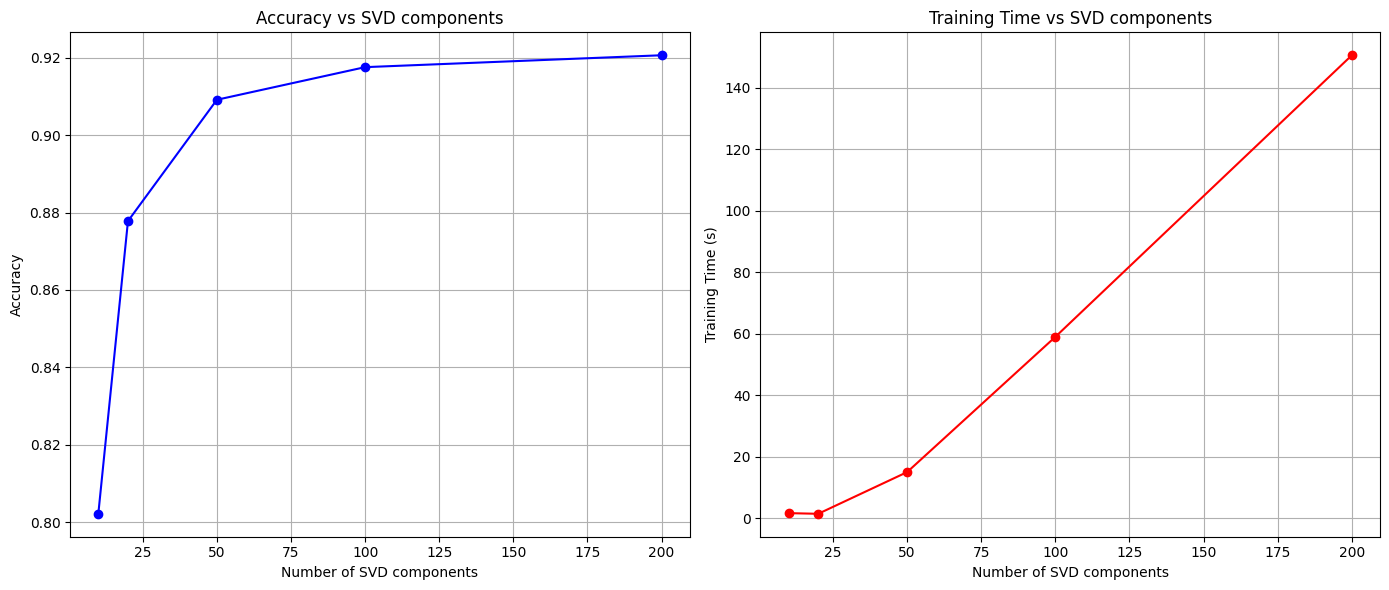

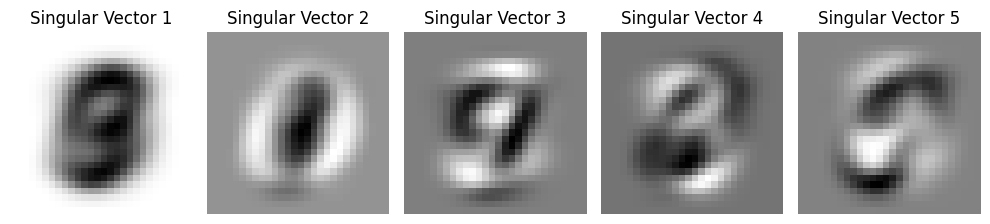

In [39]:
components = [10, 20, 50, 100, 200]

accuracies = []
times = []
singular_vectors_top5 = None  # To store top 5 singular vectors for visualization

# Logistic regression model
model = LogisticRegression(max_iter=1000, solver='saga', random_state=42)

for n in components:
    # Apply SVD to both training and test sets
    X_train_reduced, X_test_reduced, U, S = apply_svd_custom(X_train, X_test, n_components=n)

    # Store top 5 singular vectors when n_components is large enough
    if n >= 5 and singular_vectors_top5 is None:
        singular_vectors_top5 = U[:, :5]

    # Measure training time and fit the model
    start_time = time.time()
    model.fit(X_train_reduced, y_train)
    training_time = time.time() - start_time

    # Make predictions and calculate accuracy
    y_pred = model.predict(X_test_reduced)
    accuracy = accuracy_score(y_test, y_pred)

    # Store results
    accuracies.append(accuracy)
    times.append(training_time)

    print(f"SVD components: {n}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")

# Plot accuracy vs. number of components
plt.figure(figsize=(14, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(components, accuracies, marker='o', label='Accuracy', color='blue')
plt.xlabel('Number of SVD components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs SVD components')
plt.grid(True)

# Training time plot
plt.subplot(1, 2, 2)
plt.plot(components, times, marker='o', label='Training Time', color='red')
plt.xlabel('Number of SVD components')
plt.ylabel('Training Time (s)')
plt.title('Training Time vs SVD components')
plt.grid(True)

plt.tight_layout()
plt.show()

# Visualize top 5 singular vectors (reshape them to 28x28 images)
if singular_vectors_top5 is not None:
    plt.figure(figsize=(10, 4))
    for i in range(5):
        singular_vector = singular_vectors_top5[:, i].reshape(28, 28)
        plt.subplot(1, 5, i+1)
        plt.imshow(singular_vector, cmap='gray')
        plt.title(f'Singular Vector {i+1}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

## Part 6: Analyze / Conclusion

YOUR ANSWER:

The number of SVD components that looks best to me is 50 components. That is beacuse there is it has a pretty high accuracy of 90.91%. The training time is also significantly lower are 15.07 seconds which is considerably lower than using 100 or 200 components.